# Creating a K-means clustering algorithm to group customers of a retail store based on their purchase history

## 1. Importing the libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
data = pd.read_csv(r"Mall_Customers.csv")

In [51]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


C:\Users\mayank dandriyal\AppData\Local\Temp\ipykernel_13232\1038317283.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Spending Score (1-100)'] ,data['Age'] , s=50, alpha= 0.3, cmap= 'viridis')


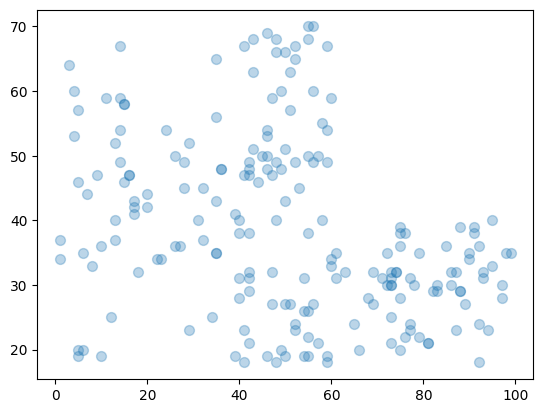

In [57]:
plt.scatter(data['Spending Score (1-100)'] ,data['Age'] , s=50, alpha= 0.3, cmap= 'viridis')

In [58]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. Data preprocessing

In [59]:
data["Gender"] = data["Gender"].map({'Female' : 0, 'Male' : 1})

In [60]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [61]:
scal = StandardScaler()
feat = ["CustomerID" , "Gender" , "Age" , "Annual Income (k$)" , "Spending Score (1-100)"]

data[feat] = scal.fit_transform(data[feat])

In [62]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


## 3. Initializing and fitting the data to the model

In [63]:
kmeans = KMeans(n_clusters= 3, random_state= 42)

In [64]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [65]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [66]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [67]:
centers

array([[-0.47192101,  0.04093069,  1.13852727, -0.42245682, -0.37379617],
       [ 0.96109881,  0.07402327, -0.32136456,  0.89868589,  0.07258729],
       [-1.03771518, -0.175385  , -0.86450717, -0.99357269,  0.33934611]])

## 4. Plotting the K-means clustering after fitting the model with the data

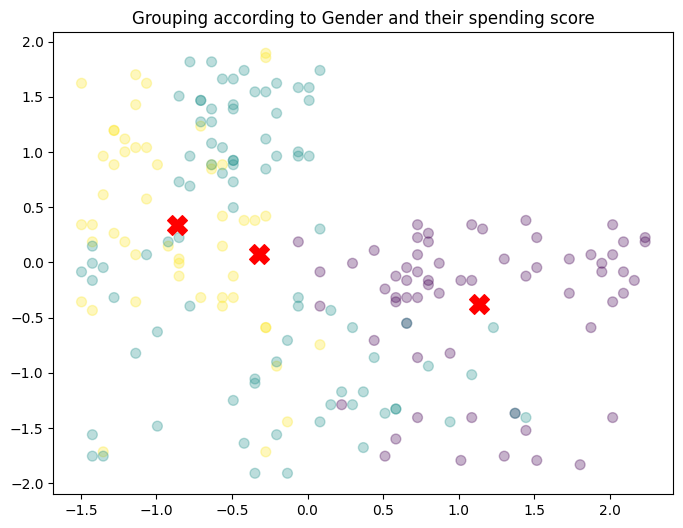

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(data['Age'] , data['Spending Score (1-100)'] ,c = labels, s=50, alpha= 0.3, cmap= 'viridis')
plt.scatter(centers[:,2], centers[:,4] ,c='red', s=200, marker='X', label = 'Centeroids')
plt.title("Grouping according to Age and their spending score")
plt.show()

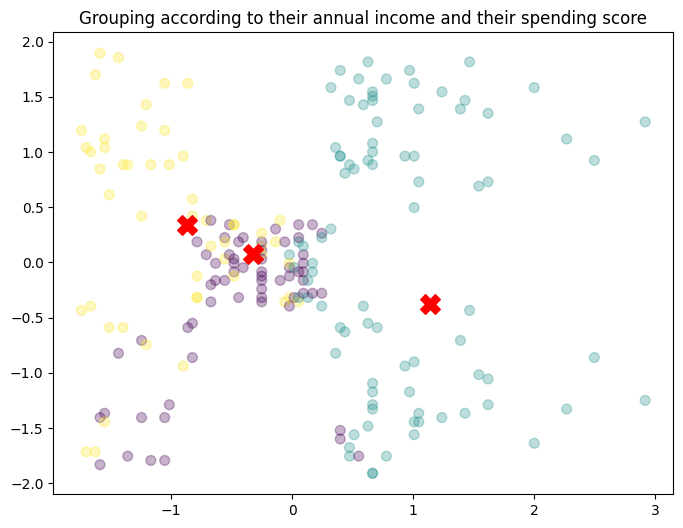

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'] , data['Spending Score (1-100)'] ,c = labels, s=50, alpha= 0.3, cmap= 'viridis')
plt.scatter(centers[:,2], centers[:,4] ,c='red', s=200, marker='X', label = 'Centeroids')
plt.title("Grouping according to their annual income and their spending score")
plt.show()